In [1]:
#imports
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhure\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhure\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#data loading
csv_file_path1 = "C:/Users/abhure/Documents/SEM3/Text Analytics/Project/Data/raw data/all-data.csv"
csv_file_path2 = "C:/Users/abhure/Documents/SEM3/Text Analytics/Project/Data/raw data/RoBERTaWeaklyLabelling.csv"
try:
    df1 = pd.read_csv(csv_file_path1, encoding='utf-8')
except UnicodeDecodeError:
    df1 = pd.read_csv(csv_file_path1, encoding='latin1')
try:
    df2 = pd.read_csv(csv_file_path2, encoding='utf-8')
except UnicodeDecodeError:
    df2 = pd.read_csv(csv_file_path2, encoding='latin1')
df1.head()
df2.head()

,news,label
0,BRIEF-Sapiens Sees FY 2018 Revenue $280 Mln To...,positive
1,"Congo, U.N. deploy specialists to tackle Ebola...",negative
2,Four Seasons Education Announces Dividend,positive
3,India's bonds slump on worries about higher fi...,negative
4,Romney kicks off Senate bid in Utah,neutral


In [3]:
#dataframe concatination
if set(df1.columns) == set(df2.columns):
    df = pd.concat([df1, df2], ignore_index=True)
else:
    column_mapping = {'news': 'news', 'label': 'label'}
    df2 = df2.rename(columns=column_mapping)
    
    # Append df2 to df1
    df = pd.concat([df1, df2], ignore_index=True)

df

,label,news
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
77155,neutral,Decision needed on BoE's ECB stake after Brexi...
77156,negative,Breakingviews TV: X factor
77157,positive,BRIEF-MagneGas To Expand Green Arc Sales Force...
77158,neutral,Uber introduces new safety features as it figh...


In [4]:
#dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77160 entries, 0 to 77159
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   77160 non-null  object
 1   news    76548 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None


In [5]:
#checking for null values
df.isna().sum()

label      0
news     612
dtype: int64

In [6]:
#drop the null values
df.dropna(inplace=True)
print(df.isnull().sum())

label    0
news     0
dtype: int64


In [7]:
unique_labels = df['label'].unique()
print(unique_labels)

['neutral' 'negative' 'positive' 'Positive' 'Neutral' 'Negative']


In [8]:
#converting all the labels to lowercase
df['label'] = df['label'].apply(lambda x: x.lower())
unique_labels = df['label'].unique()
print(unique_labels)

['neutral' 'negative' 'positive']


In [9]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the labels
df['label'] = label_encoder.fit_transform(df['label'])
df

,label,news
0,1,"According to Gran , the company has no plans t..."
1,1,Technopolis plans to develop in stages an area...
2,0,The international electronic industry company ...
3,2,With the new production plant the company woul...
4,2,According to the company 's updated strategy f...
...,...,...
77155,1,Decision needed on BoE's ECB stake after Brexi...
77156,0,Breakingviews TV: X factor
77157,2,BRIEF-MagneGas To Expand Green Arc Sales Force...
77158,1,Uber introduces new safety features as it figh...


In [10]:
# Create separate text strings for each sentiment
positive_text = ' '.join(df[df['label'] == label_encoder.transform(['positive'])[0]]['news'])
negative_text = ' '.join(df[df['label'] == label_encoder.transform(['negative'])[0]]['news'])
neutral_text = ' '.join(df[df['label'] == label_encoder.transform(['neutral'])[0]]['news'])

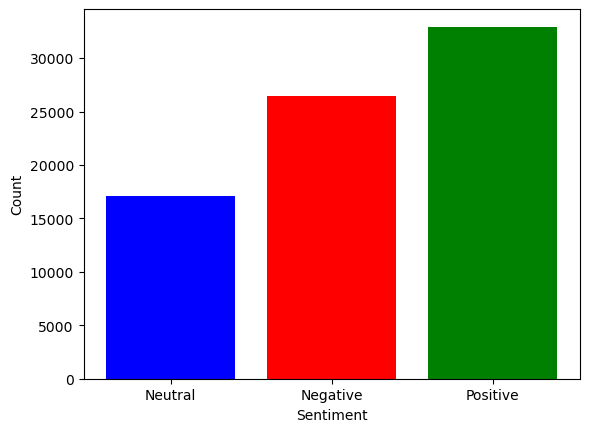

In [11]:
#create a histigram for values across diffrenet classes
counts = df['label'].value_counts()
plt.bar(counts.index, counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(counts.index, ['Positive', 'Negative', 'Neutral'])
plt.show()

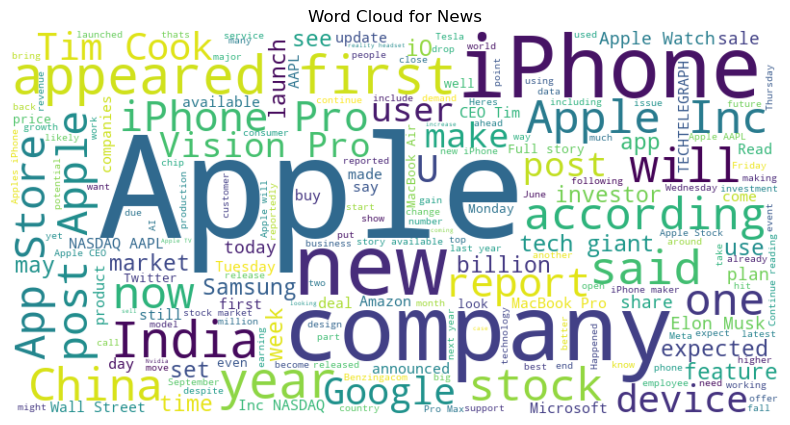

In [12]:
# Combine all news texts into a single string
text = ' '.join(df['news'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for News')
plt.show()

In [13]:
# Generate word clouds for each sentiment
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

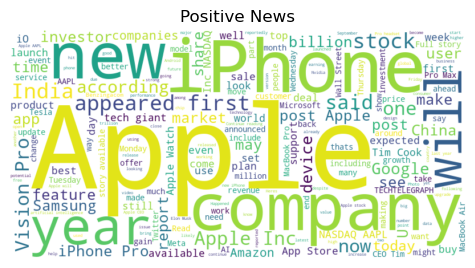

In [14]:
# Display the generated word clouds
plt.figure(figsize=(20, 10))

# Positive word cloud
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive News')
plt.show()

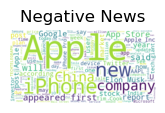

In [15]:
# Negative word cloud
plt.subplot(1, 3, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative News')
plt.show()

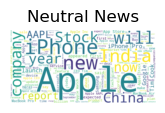

In [16]:
# Neutral word cloud
plt.subplot(1, 3, 3)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral News')
plt.show()